<a href="https://colab.research.google.com/github/poppvk935/Astrophysics-Deep-Learning/blob/main/Tutorial/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
import torch
import torch.nn as nn #pytorch neural network library
import torch.nn.functional as F

#Iris Flower Deep Learning Dataset

In [263]:
#Create a model class that inherits nn.Module
class Model(nn.Module):
  #Input Layer (4 Features of the flower) -->
  #Hidden layer 1(number of nodes) -->
  #H2(num of nodes) -->
  #Output(3 classes of iris flowers)

#  Two underscores before and after init
#__init__(self, var name for inputs = number of inputs, var name for hidden layers = number of nodes in layer,var name for outputs = number of outputs)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate nn.module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)
    #moving through the nodes

#inherits self
  def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)

      return x


In [264]:
#create a manual seed
#   Neural networks need random numbers to start as a seed

torch.manual_seed(345) #number doesn't matter

#Create and instance of model

model = Model()

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [266]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv' #load the data with url
my_df = pd.read_csv(url) #datafile

In [267]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [268]:
my_df.head()
#top 5 of dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [269]:
my_df.tail()
#bottom 5 of dataset

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [270]:
#change last column from strings to float
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

/tmp/ipython-input-1824942605.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [271]:
# Train Test Split
#set x, y

X = my_df.drop('species', axis = 1) #drop the species column because that is the output
y = my_df['species']

In [272]:
#Convert these to numpy arrays
X = X.values
y = y.values

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
#Run train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=345)
#test size says hold in this case 20% of data for testing

In [275]:
#convert numpy arrays into tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [276]:
#convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [277]:
#Set the criterion of our model to measure the error
#Error = how far off the predictions are from the data

criterion = nn.CrossEntropyLoss()
#Choose optimizer - using Adam optimizer
#Set learning rate = lr = learning rate(if error doesn't go down after a bunch of epochs, lower rate)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
#parameters are the amount of layers including output



In [278]:
#Train Model
#Determing number of epochs (Epoch = one run through all the training data in network)

epochs = 100
#need to keep track of loss and errors
losses = []
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(X_train) #get predicted results

  #measure loss/error, will be high at first
  loss = criterion(y_pred, y_train) #predicted value vs the y_train value

  #keep track of losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs

  if i%10 ==0:
    print(f'Epoch: {i} and loss: {loss}')

#do some back propogation: Take error rate of forward prop and feed it back through the network
#find tuning the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #make sure these are in the loop lol

Epoch: 0 and loss: 1.1774160861968994
Epoch: 10 and loss: 0.9879879355430603
Epoch: 20 and loss: 0.6994983553886414
Epoch: 30 and loss: 0.40132036805152893
Epoch: 40 and loss: 0.25131580233573914
Epoch: 50 and loss: 0.14954067766666412
Epoch: 60 and loss: 0.10177740454673767
Epoch: 70 and loss: 0.08169875293970108
Epoch: 80 and loss: 0.0719132125377655
Epoch: 90 and loss: 0.06637075543403625


Text(0.5, 0, 'Epoch')

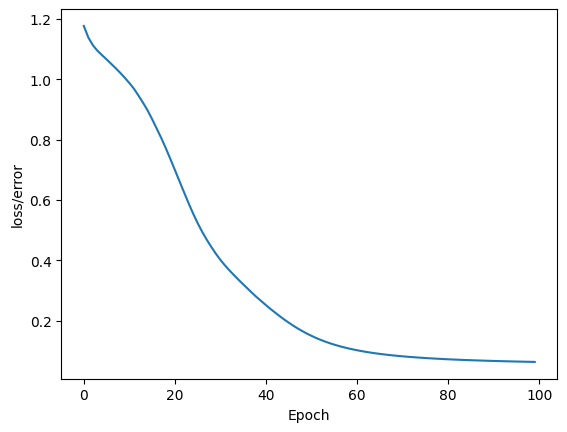

In [279]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")


In [280]:
#Evaluate Model on Test Data Set
with torch.no_grad():
  #turns off back propogation
  y_eval = model.forward(X_test)
  #X_test are features from our test set
  #y_eval are the predictions
  loss = criterion(y_eval, y_test) #find loss



In [281]:
loss
#we want to see the final loss in training be close to this loss value

tensor(0.0168)

In [282]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

  #will tell us what type of flower the nn thinks it is
    print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}')
  #the highest number in the tensor is what the nn thinks the flower is
  #first value is 0 or species setosa, second is 1 or Versicolor, third is 2 or virginica

  #correct or not
    if y_val.argmax().item() == y_test[i]:
     correct += 1

print(f'We got {correct} correct ')

1.) tensor([ 12.3742,   5.9597, -14.1754]) 	 Setosa 	 0
2.) tensor([-6.5307,  2.7358,  7.6020]) 	 Virginica 	 2
3.) tensor([-2.5555,  5.6397,  1.8457]) 	 Versicolor 	 1
4.) tensor([ 13.2625,   6.3408, -15.1417]) 	 Setosa 	 0
5.) tensor([ 13.8701,   6.5660, -15.7925]) 	 Setosa 	 0
6.) tensor([-1.7030,  5.6313,  0.7566]) 	 Versicolor 	 1
7.) tensor([-4.8701,  4.2562,  5.1121]) 	 Virginica 	 2
8.) tensor([ 12.1112,   6.2647, -14.0498]) 	 Setosa 	 0
9.) tensor([-7.4541,  2.1136,  8.8901]) 	 Virginica 	 2
10.) tensor([-2.1284,  5.8268,  1.2745]) 	 Versicolor 	 1
11.) tensor([-0.6809,  6.4154, -0.7622]) 	 Versicolor 	 1
12.) tensor([ 12.8535,   6.1380, -14.6876]) 	 Setosa 	 0
13.) tensor([-7.4904,  2.9843,  8.7516]) 	 Virginica 	 2
14.) tensor([ 11.8486,   5.8680, -13.6434]) 	 Setosa 	 0
15.) tensor([-2.7435,  5.5235,  2.1207]) 	 Versicolor 	 1
16.) tensor([-6.9480,  2.5127,  8.1511]) 	 Virginica 	 2
17.) tensor([ 14.3359,   6.3893, -16.1806]) 	 Setosa 	 0
18.) tensor([ 12.9815,   6.4797, -1